In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../dataset/covid_19_indonesia_time_series_all.csv')

In [21]:
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [3]:
data_jakarta = df[df['Location'] == 'DKI Jakarta'][['Date','Location','New Cases','New Deaths','Total Cases','Total Deaths']]
data_jakarta

,Date,Location,New Cases,New Deaths,Total Cases,Total Deaths
0,3/1/2020,DKI Jakarta,2,0,39,20
1,3/2/2020,DKI Jakarta,2,0,41,20
4,3/3/2020,DKI Jakarta,2,0,43,20
8,3/4/2020,DKI Jakarta,2,0,45,20
12,3/5/2020,DKI Jakarta,0,1,45,21
...,...,...,...,...,...,...
21601,11/28/2021,DKI Jakarta,51,0,863862,13596
21635,11/29/2021,DKI Jakarta,41,0,863903,13596
21668,11/30/2021,DKI Jakarta,44,0,863947,13596
21701,12/1/2021,DKI Jakarta,70,0,864017,13596


In [4]:
data_jabar = df[df['Location'] == 'Jawa Barat'][['Date','Location','New Cases','New Deaths','Total Cases','Total Deaths']]
data_jabar

,Date,Location,New Cases,New Deaths,Total Cases,Total Deaths
6,3/3/2020,Jawa Barat,1,1,1,1
10,3/4/2020,Jawa Barat,1,0,2,1
14,3/5/2020,Jawa Barat,1,0,3,1
19,3/6/2020,Jawa Barat,1,0,4,1
24,3/7/2020,Jawa Barat,0,0,4,1
...,...,...,...,...,...,...
21605,11/28/2021,Jawa Barat,25,0,707696,14732
21639,11/29/2021,Jawa Barat,29,2,707725,14734
21672,11/30/2021,Jawa Barat,68,3,707793,14737
21705,12/1/2021,Jawa Barat,58,0,707851,14737


Mari kita hitung rata - rata kasus per hari setiap bulannya antara data_jakarta dengan data_jabar

In [5]:
data_jakarta['Date'] = pd.to_datetime(data_jakarta['Date'])

In [6]:
data_jabar['Date'] = pd.to_datetime(data_jabar['Date'])

In [7]:
data_jakarta.index = data_jakarta['Date']
data_jabar.index = data_jabar['Date']

In [8]:
data_jakarta

,Date,Location,New Cases,New Deaths,Total Cases,Total Deaths
Date,,,,,,
2020-03-01,2020-03-01,DKI Jakarta,2,0,39,20
2020-03-02,2020-03-02,DKI Jakarta,2,0,41,20
2020-03-03,2020-03-03,DKI Jakarta,2,0,43,20
2020-03-04,2020-03-04,DKI Jakarta,2,0,45,20
2020-03-05,2020-03-05,DKI Jakarta,0,1,45,21
...,...,...,...,...,...,...
2021-11-28,2021-11-28,DKI Jakarta,51,0,863862,13596
2021-11-29,2021-11-29,DKI Jakarta,41,0,863903,13596
2021-11-30,2021-11-30,DKI Jakarta,44,0,863947,13596


In [9]:
data_jakarta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 642 entries, 2020-03-01 to 2021-12-02
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          642 non-null    datetime64[ns]
 1   Location      642 non-null    object        
 2   New Cases     642 non-null    int64         
 3   New Deaths    642 non-null    int64         
 4   Total Cases   642 non-null    int64         
 5   Total Deaths  642 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 35.1+ KB


In [10]:
data_jakarta = data_jakarta[(data_jakarta['Date']>='2021-01-01')&(data_jakarta['Date']<='2021-12-31')]

In [11]:
data_jakarta

,Date,Location,New Cases,New Deaths,Total Cases,Total Deaths
Date,,,,,,
2021-01-01,2021-01-01,DKI Jakarta,1956,20,185690,3290
2021-01-02,2021-01-02,DKI Jakarta,1894,26,187584,3316
2021-01-03,2021-01-03,DKI Jakarta,1658,10,189242,3326
2021-01-04,2021-01-04,DKI Jakarta,1832,21,191074,3347
2021-01-05,2021-01-05,DKI Jakarta,1824,19,192898,3366
...,...,...,...,...,...,...
2021-11-28,2021-11-28,DKI Jakarta,51,0,863862,13596
2021-11-29,2021-11-29,DKI Jakarta,41,0,863903,13596
2021-11-30,2021-11-30,DKI Jakarta,44,0,863947,13596


In [12]:
data_jakarta.groupby(by=[data_jakarta.index.month,data_jakarta.index.year])['New Cases'].mean()

Date  Date
1     2021    2773.580645
2     2021    2500.285714
3     2021    1365.354839
4     2021     885.500000
5     2021     691.612903
6     2021    3780.266667
7     2021    8748.129032
8     2021    1159.000000
9     2021     239.400000
10    2021     121.806452
11    2021      80.200000
12    2021      49.000000
Name: New Cases, dtype: float64

In [13]:
data_jabar = data_jabar[(data_jabar['Date']>= '2021-01-01')&(data_jabar['Date']<='2021-12-31')]
data_jabar

,Date,Location,New Cases,New Deaths,Total Cases,Total Deaths
Date,,,,,,
2021-01-01,2021-01-01,Jawa Barat,1376,15,91592,1461
2021-01-02,2021-01-02,Jawa Barat,1214,7,92806,1468
2021-01-03,2021-01-03,Jawa Barat,916,7,93722,1475
2021-01-04,2021-01-04,Jawa Barat,1224,8,94946,1483
2021-01-05,2021-01-05,Jawa Barat,1203,12,96149,1495
...,...,...,...,...,...,...
2021-11-28,2021-11-28,Jawa Barat,25,0,707696,14732
2021-11-29,2021-11-29,Jawa Barat,29,2,707725,14734
2021-11-30,2021-11-30,Jawa Barat,68,3,707793,14737


In [14]:
data_jabar.groupby(by=[data_jabar.index.month,data_jabar.index.year])['New Cases'].mean()

Date  Date
1     2021    2027.129032
2     2021    2171.785714
3     2021    1221.870968
4     2021    1031.000000
5     2021    1055.806452
6     2021    2324.500000
7     2021    7121.032258
8     2021    2742.935484
9     2021     394.900000
10    2021      98.677419
11    2021      65.466667
12    2021      70.500000
Name: New Cases, dtype: float64

In [15]:
data_jabar_2021 = pd.DataFrame(data_jabar.groupby(by=[data_jabar.index.month,data_jabar.index.year])['New Cases'].mean())
data_jabar_2021

,,New Cases
Date,Date,
1,2021,2027.129032
2,2021,2171.785714
3,2021,1221.870968
4,2021,1031.000000
5,2021,1055.806452
6,2021,2324.500000
7,2021,7121.032258
8,2021,2742.935484
9,2021,394.900000


In [16]:
data_jakarta_2021 = pd.DataFrame(data_jakarta.groupby(by=[data_jakarta.index.month,data_jakarta.index.year])['New Cases'].mean())
data_jakarta_2021

,,New Cases
Date,Date,
1,2021,2773.580645
2,2021,2500.285714
3,2021,1365.354839
4,2021,885.500000
5,2021,691.612903
6,2021,3780.266667
7,2021,8748.129032
8,2021,1159.000000
9,2021,239.400000


Dari 2 data tersebut , mari kita coba cari bagaimana rata - rata setiap bulan dari jabar dan jakarta , mana yang lebih besar

In [17]:
data_jabar_2021['New Cases'].mean() , data_jakarta_2021['New Cases'].mean()

(1693.8003328213008, 1866.1780209933438)

Apakah rata - rata jkt lbh ebsar dari jabar ?

Secara data eksplisit , dapat dilihat bahwa rata - rata kasus baru di jakarta lebih besar ,dapat disimpulkan bahwa :
- H0 Data Jakarta = Data Jabar #H0 harus ada sama dengan --kalau gk ada klaim , bkin cerita / klaim sendiri
- H1 Data Jakarta != Data Jabar

Two samples independent two tail testing

In [18]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
t_stat,p_val = stats.ttest_ind(data_jabar_2021,data_jakarta_2021)
print('P-value: ',p_val[0])
print('T-statistics: ',t_stat[0])

P-value:  0.8515591721938649
T-statistics:  -0.1893440389381089


Dari sini kita lihat bahwa setelah memanfaatkan two tailed independent 

C:\Users\Cranel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cranel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


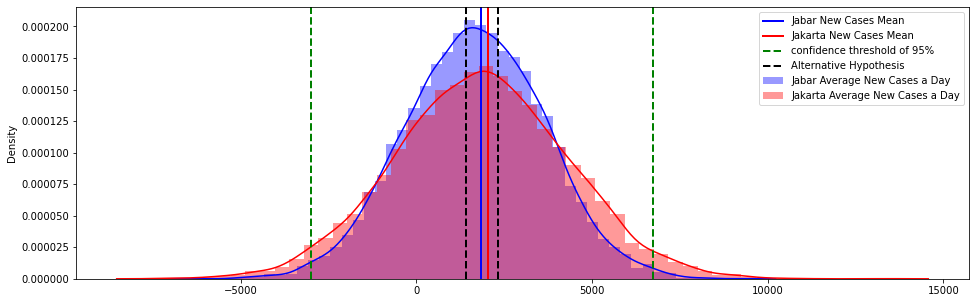

In [20]:
jabar = np.random.normal(data_jabar_2021['New Cases'].mean(),data_jabar_2021['New Cases'].std(),10000)
jakarta = np.random.normal(data_jakarta_2021['New Cases'].mean(),data_jakarta_2021['New Cases'].std(),10000)

ci = stats.norm.interval(0.95,data_jakarta_2021['New Cases'].mean(),data_jakarta_2021['New Cases'].std())
plt.figure(figsize=(16,5))
sns.distplot(jabar,label='Jabar Average New Cases a Day',color='blue')
sns.distplot(jakarta,label='Jakarta Average New Cases a Day',color='red')

plt.axvline(data_jabar['New Cases'].mean(),color='blue',linewidth=2,label='Jabar New Cases Mean')
plt.axvline(data_jakarta['New Cases'].mean(),color='red',linewidth=2,label='Jakarta New Cases Mean')

plt.axvline(ci[1],color='green',linestyle='dashed',linewidth=2,label='confidence threshold of 95%')
plt.axvline(ci[0],color='green',linestyle='dashed',linewidth=2)

plt.axvline(data_jakarta_2021['New Cases'].mean()+t_stat[0]*data_jakarta_2021['New Cases'].std(),color='black',linestyle='dashed',linewidth=2,label='Alternative Hypothesis')
plt.axvline(data_jakarta_2021['New Cases'].mean()-t_stat[0]*data_jakarta_2021['New Cases'].std(),color='black',linestyle='dashed',linewidth=2)

plt.legend()